### Gradient Descent:
Gradient Descent is a popular optimization algorithm used in machine learning and deep learning to minimize a cost function or loss function.\
Gradient descent is an optimization algorithm which is commonly-used to train machine learning models and neural networks. It trains machine learning models by minimizing errors between predicted and actual results.

#### Basic Gradient Descent Algorithm
* Initialize Parameters: Start with an initial guess for the parameters.
* Compute Gradient: Calculate the gradient of the cost function with respect to the parameters.
* Update Parameters: Adjust the parameters in the direction opposite to the gradient by a factor called the learning rate.
* Repeat: Continue the process until convergence or for a set number of iterations.

### Types of Gradient Descent
**1. Batch gradient descent** 

Batch gradient descent sums the error for each point in a training set, updating the model only after all training examples have been evaluated. This process referred to as a training epoch. It uses the entire training dataset to compute the gradient of the cost function in each iteration.

*Pros and Cons*\
Some benefits of batch are its computational efficiency, which produces a stable error gradient and a stable convergence. Some drawbacks are that the stable error gradient can sometimes result in a state of convergence that isn’t the best the model can achieve. It also requires the entire training dataset to be in memory and available to the algorithm.

**2. Stochastic gradient descent**

Stochastic gradient descent (SGD) runs a training epoch for each example within the dataset and it updates each training example's parameters one at a time.It uses a single training example (or a small random subset) to compute the gradient in each iteration.

*Pros and Cons*\
While these frequent updates can offer more detail and speed, it can result in losses in computational efficiency when compared to batch gradient descent. Its frequent updates can result in noisy gradients, but this can also be helpful in escaping the local minimum and finding the global one.

**3. Mini-batch gradient descent**

Mini-batch gradient descent combines concepts from both batch gradient descent and stochastic gradient descent. It splits the training dataset into small batch sizes and performs updates on each of those batches. 

*Pros and Cons*\
This approach strikes a balance between the computational efficiency of batch gradient descent and the speed of stochastic gradient descent. But it requires tuning of mini-batch size.



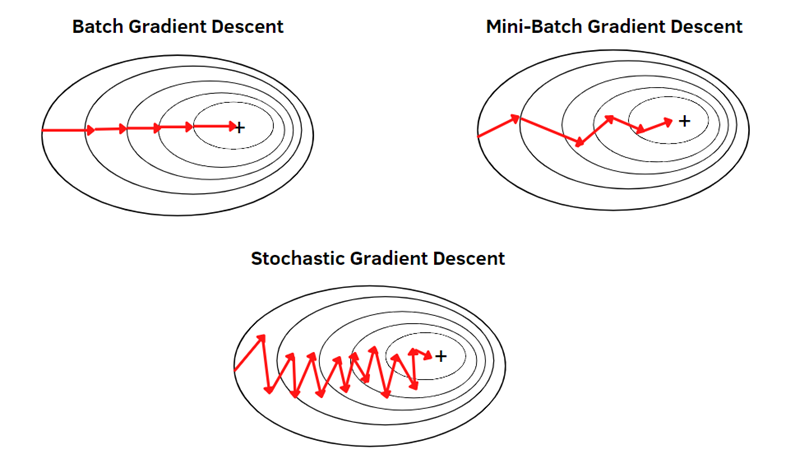

---

### Validation set
A validation set is a subset of the data that is used to evaluate the model during training, but it is not used to train the model itself. The main purpose of the validation set is to provide an unbiased evaluation of the model's performance while it is being trained.

**Process:**\
**Data Splitting:** Typically, the dataset is divided into three parts:
* Training Set: Used to train the model.
* Validation Set: Used to tune the model's hyperparameters and evaluate its performance during training.
* Test Set: Used to assess the final performance of the model after training is complete.

**Cross-Validation:** In some cases, especially with smaller datasets, cross-validation techniques such as k-fold cross-validation are used. This involves splitting the data into k subsets (or folds) and iteratively using each subset as a validation set while training on the remaining folds.

### Validation Loss
Validation loss is the value of the loss function computed on the validation set. It measures how well the model performs on data that it has not been trained on.\
The validation loss is a measure of how well the model generalizes to the validation set. It represents the error on unseen data.
An increasing validation loss indicates that the model’s performance on the validation set is worsening, suggesting that it is becoming less effective at generalizing to new data.

**Process:** \
**During Training:**  After each training epoch or at regular intervals, the model is evaluated on the validation set, and the validation loss is computed.

**Monitoring:** The validation loss is monitored throughout the training process. This allows you to track how well the model is performing on the validation set and make adjustments as needed.



---

#### Import Libraries

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### Load tips dataset

In [19]:
tips = sns.load_dataset("tips")
tips.head()  # Display the first few rows of the dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Pre Processing

In [20]:
# Preprocessing
# Converting categorical variables
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

In [21]:
# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Building the model

In [24]:
# Create a Sequential model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Add additional hidden layers
model.add(Dense(units=32, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='linear'))  # Linear activation for regression

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile the model

In [25]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Using mean squared error for regression

#### Training the model

In [26]:
# Training the model and capturing the training history
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 14.5696 - val_loss: 10.3861
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 12.1102 - val_loss: 9.0094
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.5797 - val_loss: 7.8531
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.2713 - val_loss: 6.8314
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.6722 - val_loss: 5.9378
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.3183 - val_loss: 5.1356
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.5805 - val_loss: 4.4266
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.0410 - val_loss: 3.7921
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.2775 - val_loss: 3.2633
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.2746 - val_loss: 2.8347
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1244 - val_loss: 2.4959
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5245 - val

#### Evaluating the model

In [30]:
# Evaluating the model
loss = model.evaluate(X_test, y_test)
print('Test Set Mean Squared Error:', loss)
print('Test accuracy:', accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3446 
Test Set Mean Squared Error: 1.2338309288024902
Test accuracy: 0.7718365788459778


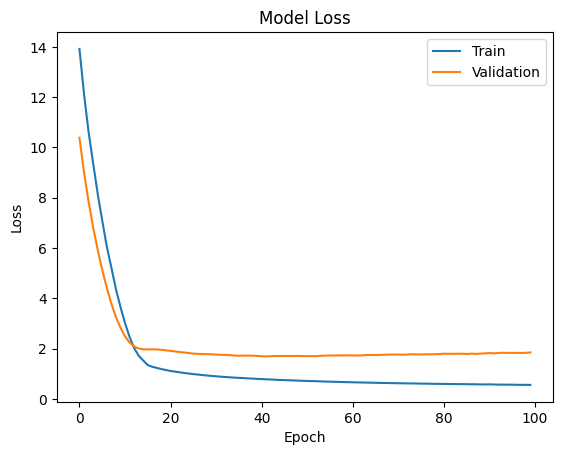

In [27]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()